In [2]:
#Необходимые библиотеки, функция генерации белого шума и нужные переменные

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy as sc

def generate_white_noise(num_samples):
    white_noise_simple = np.random.normal(size = num_samples)
    return white_noise_simple

duration = 5
sample_rate = 4100

white_noise = generate_white_noise(duration * sample_rate)

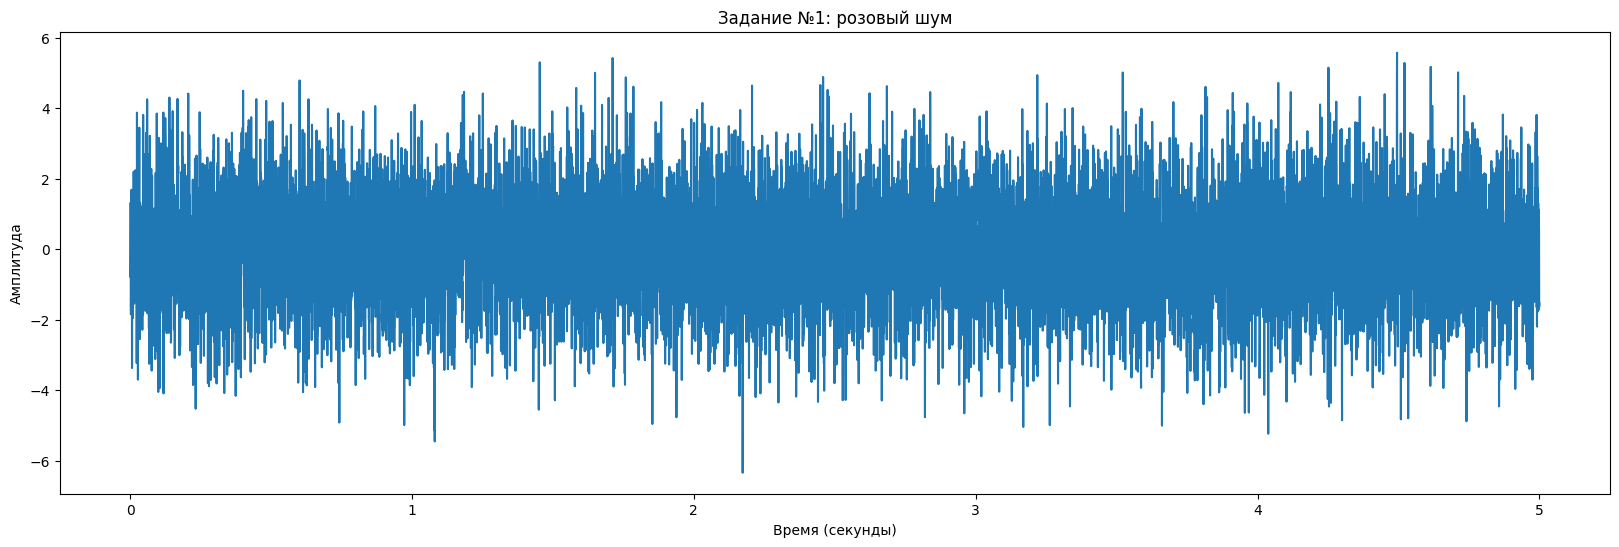

In [3]:
#Задание №1

def generate_pink_noise(white_noise, sample_rate):    
    fourier = np.fft.rfft(white_noise)
    return np.real(fourier / np.sqrt(sample_rate))

pink_noise = generate_pink_noise(white_noise, sample_rate)

time_axis = np.linspace(0, duration, len(pink_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, pink_noise)

plt.title('Задание №1: розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

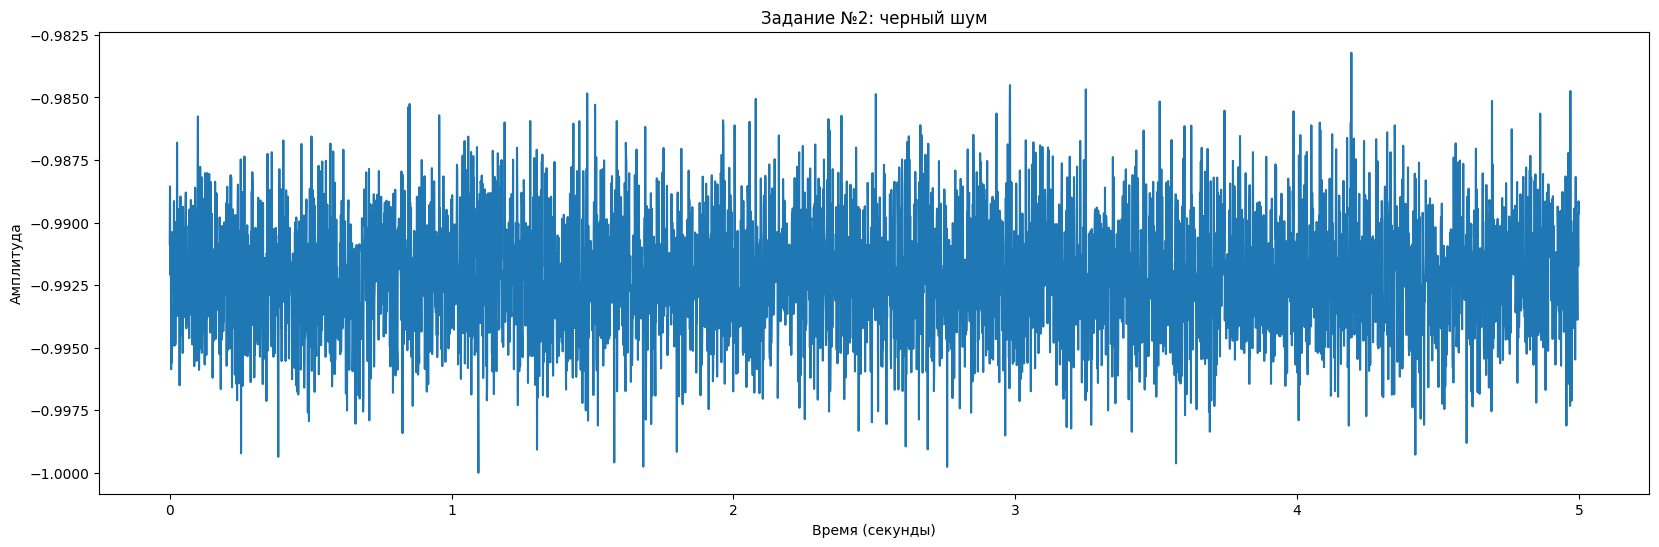

In [4]:
#Задание №2

def generate_black_noise(duration, temperature):    
    kb =  sc.constants.k
    h = sc.constants.physical_constants['Planck constant'][0]
    c = sc.constants.c

    T = temperature * 1 / 10**9

    factor1 = 2 * h / (c**2 * T**3)
    factor2 = h / (kb * T)

    freq1 = 1000
    num_samples = int(duration * freq1)
   
    eq = 10 * np.log(factor1 * np.power(freq1, 3) / (np.exp(factor2 * freq1) - 1)) + 10

    white_noise = generate_white_noise(num_samples)
    black_noise = white_noise + eq

    black_noise /= np.max(np.abs(black_noise))
    return black_noise

black_noise = generate_black_noise(duration, 17)

time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)

plt.title('Задание №2: черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

C:\Users\elise\AppData\Local\Temp\ipykernel_16176\1766702100.py:6: RuntimeWarning: divide by zero encountered in log
  values = np.log(time_points)
C:\Users\elise\AppData\Local\Temp\ipykernel_16176\1766702100.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


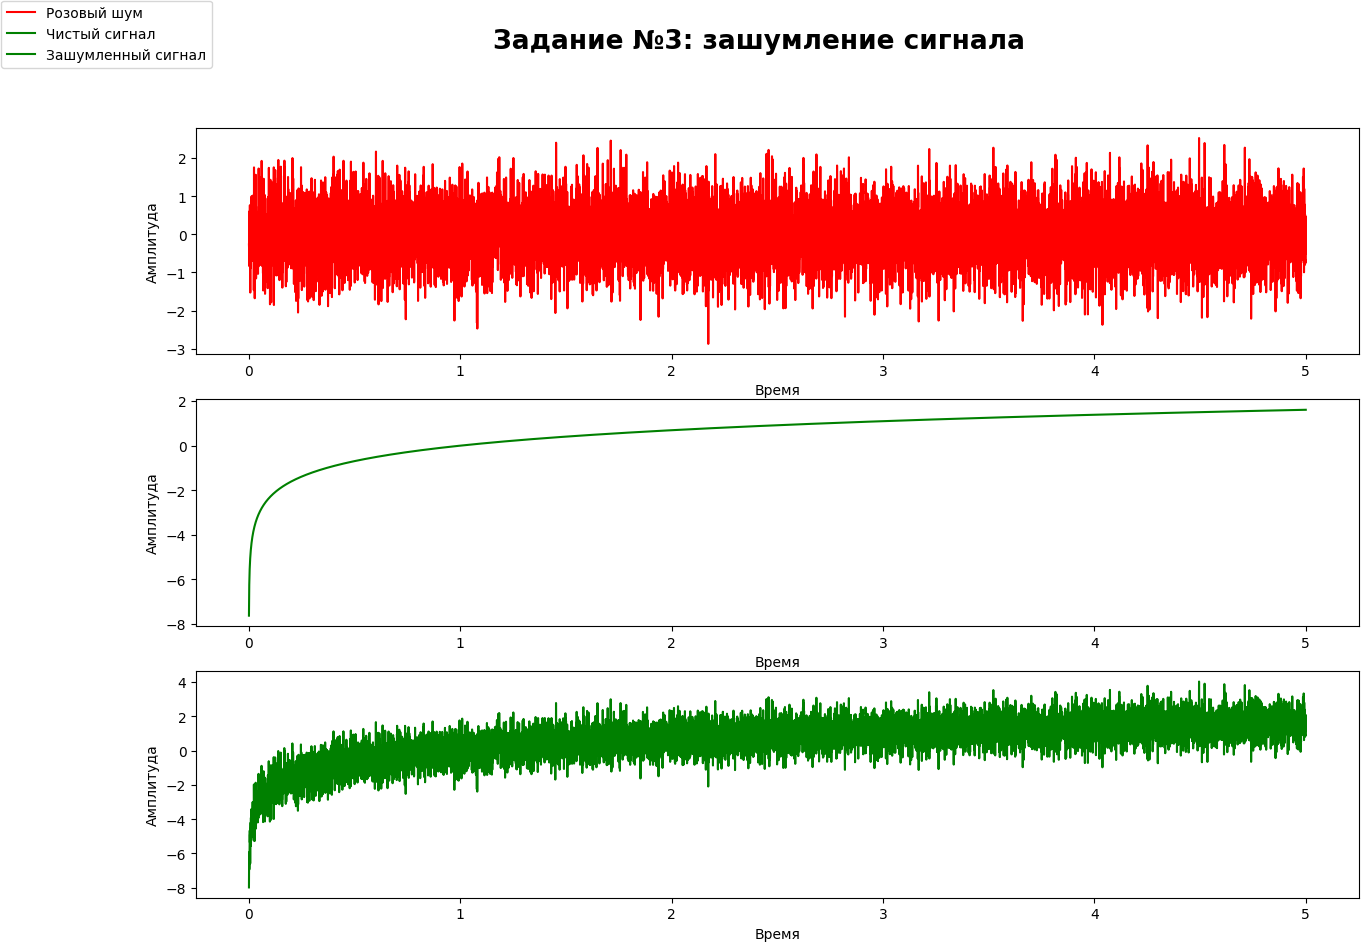

In [5]:
#Задание №3

noise_base = generate_pink_noise(white_noise, 20000)
time_points = np.linspace(0, duration, len(noise_base))

values = np.log(time_points)

noised_values = values + noise_base

fig, axs = plt.subplots(3, 1, figsize=(15, 10))

fig.suptitle('Задание №3: зашумление сигнала', fontsize=19, fontweight='bold')

labels = ["Розовый шум", "Чистый сигнал", "Зашумленный сигнал"]

c0 = axs[0].plot(time_points, noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')


c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')


c2 = axs[2].plot(time_points, noised_values, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')


fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)

plt.show()